# **Final Project Presentation**

## Tesla Stock Analysis and Predictive Modeling

In [2]:
pip install fredapi

# EXPLORATORY DATA ANALYSIS OF TSLA AND COMPETITOR COMPARISON (NIO,GM,F)

In [3]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as web
import warnings
warnings.filterwarnings('ignore')

## Open Price, Close Price, High Price, Low Price, Adj Close and Volume of stock TSLA

[*********************100%%**********************]  1 of 1 completed


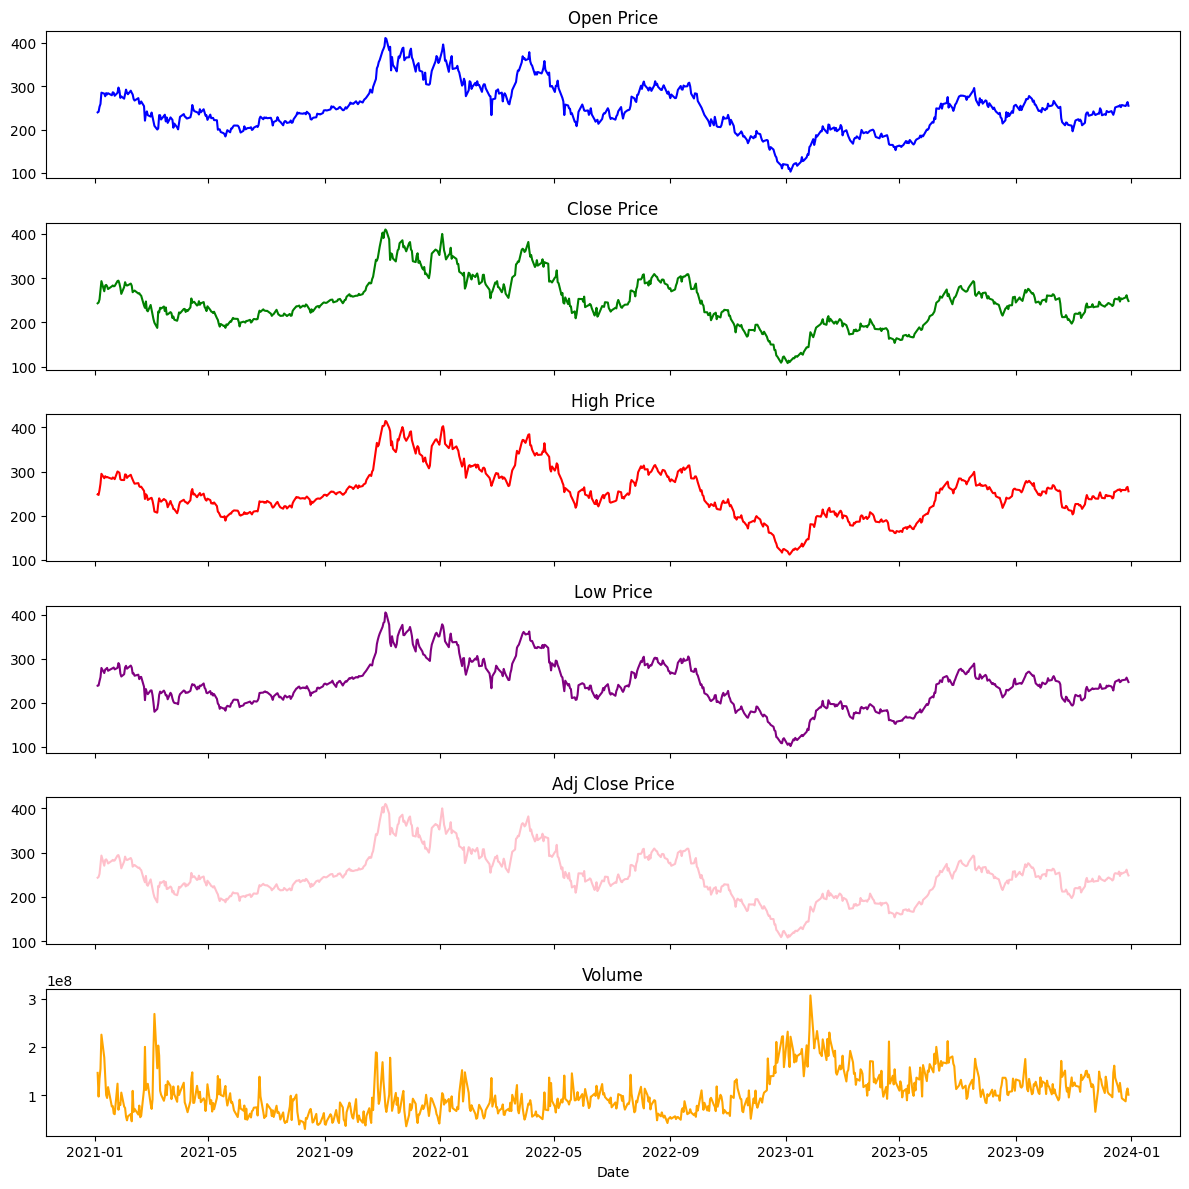

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol and time range
stock_symbol = "TSLA"
start_date = "2021-01-01"
end_date = "2023-12-31"

# Fetch the stock data from Yahoo Finance
stock_data_tsla = yf.download(stock_symbol, start=start_date, end=end_date)


# Plotting the stock price history with subplots
fig, axes = plt.subplots(6, 1, figsize=(12, 12), sharex=True)

axes[0].plot(stock_data_tsla['Open'], color='blue')
axes[0].set_title('Open Price')

axes[1].plot(stock_data_tsla['Close'], color='green')
axes[1].set_title('Close Price')

axes[2].plot(stock_data_tsla['High'], color='red')
axes[2].set_title('High Price')

axes[3].plot(stock_data_tsla['Low'], color='purple')
axes[3].set_title('Low Price')

axes[4].plot(stock_data_tsla['Adj Close'], color='pink')
axes[4].set_title('Adj Close Price')

axes[5].plot(stock_data_tsla['Volume'], color='orange')
axes[5].set_title('Volume')

# Common x-axis label
plt.xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [5]:
stock_data_tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


## Stock Price History of Tesla

[*********************100%%**********************]  1 of 1 completed


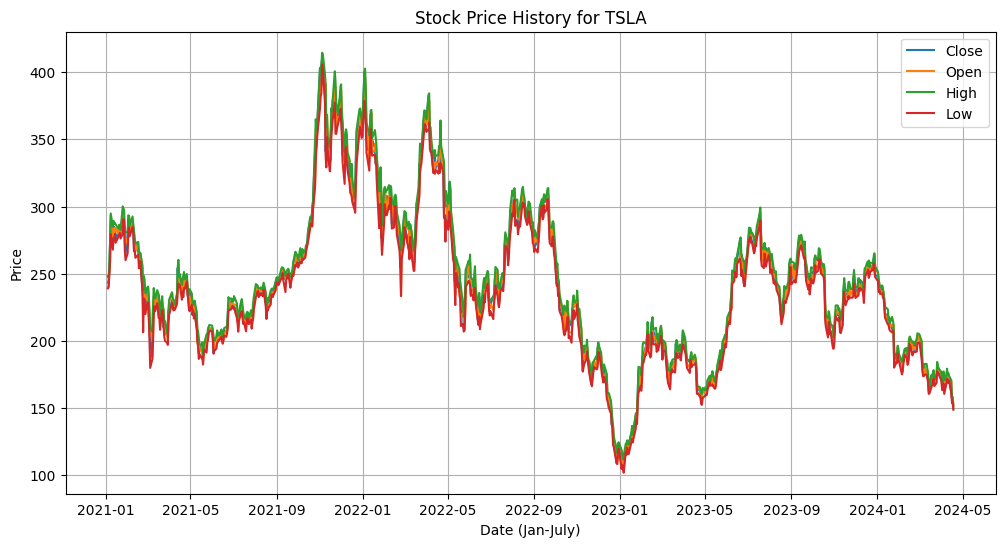

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol and time range
stock_symbol = "TSLA"
start_date = "2021-01-01"
end_date = "2024-12-31"

# Fetch the stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Plotting the stock price history
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close')
plt.plot(stock_data['Open'], label='Open')
plt.plot(stock_data['High'], label='High')
plt.plot(stock_data['Low'], label='Low')
plt.legend()
plt.title(f'Stock Price History for {stock_symbol}')
plt.xlabel('Date (Jan-July)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


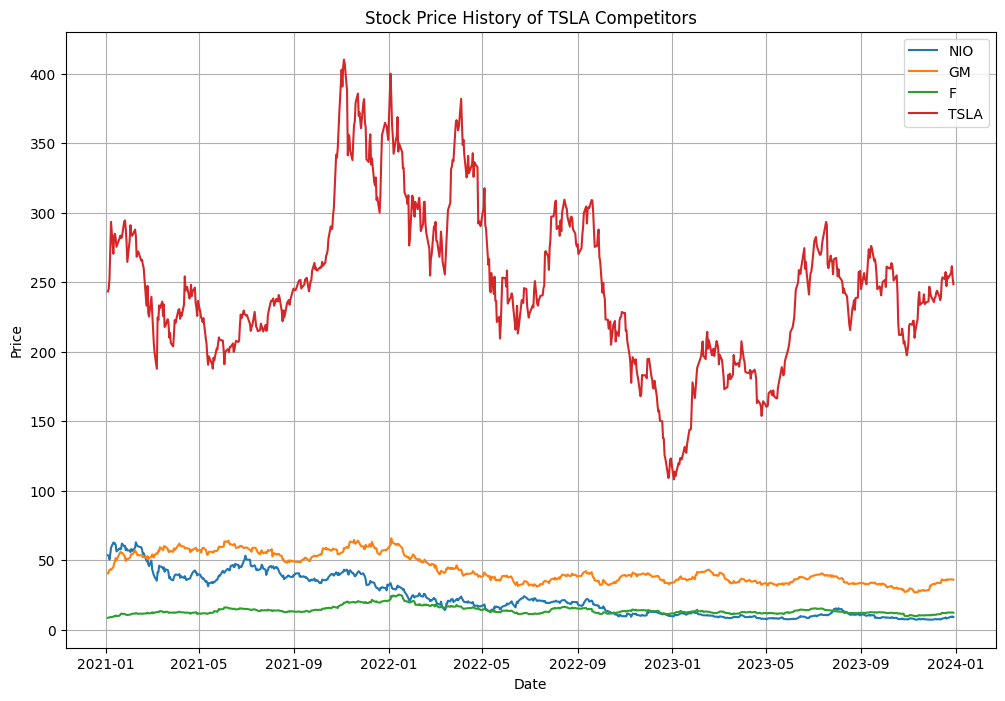

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the list of stock symbols and time range. 'TSLA', 'NIO', 'GM','F'
stock_symbols = ["NIO", "GM", "F","TSLA"]
start_date = "2021-01-01"
end_date = "2023-12-31"

# Fetch the stock data for each company
stock_data_all = {}
for symbol in stock_symbols:
    stock_data_all[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Plotting the stock price history for each company
plt.figure(figsize=(12, 8))
for symbol, data in stock_data_all.items():
    plt.plot(data['Close'], label=symbol)

plt.legend()
plt.title('Stock Price History of TSLA Competitors')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

##Volume of Stock Traded Per - Year, Month, Weekday

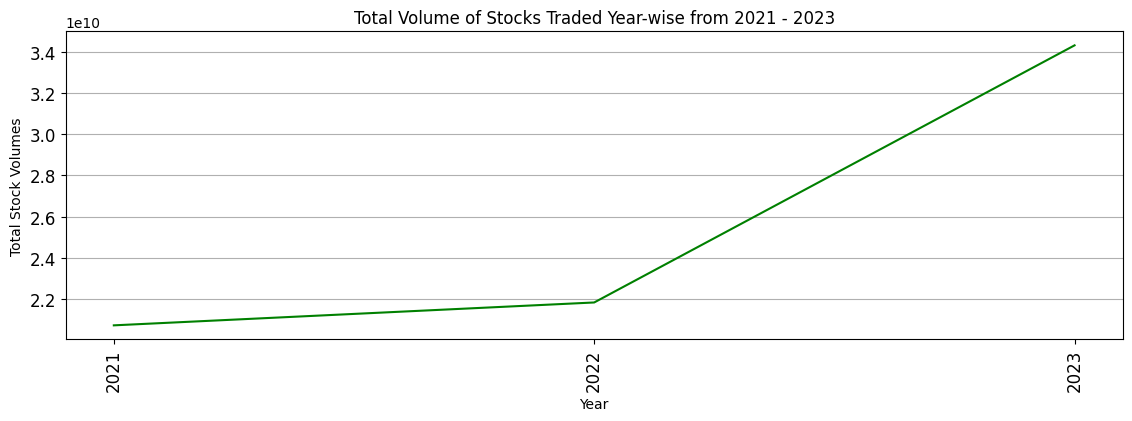

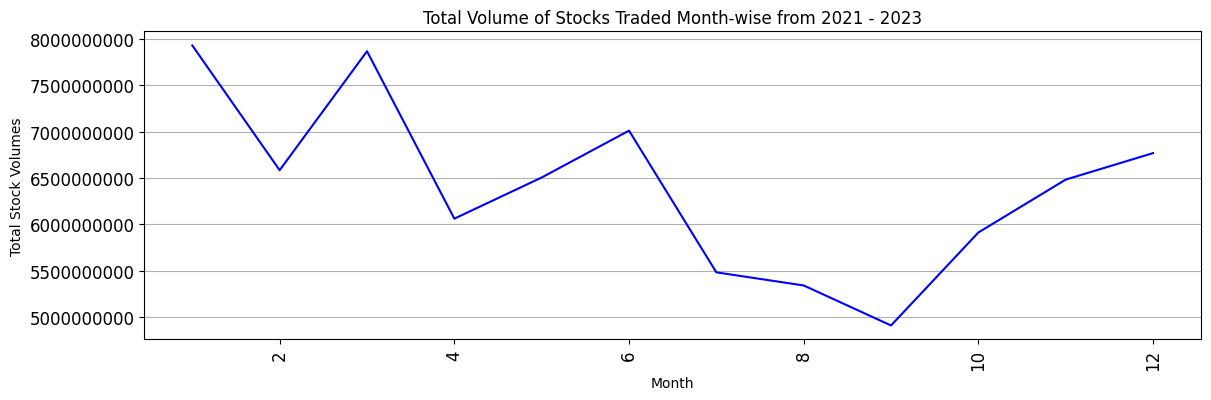

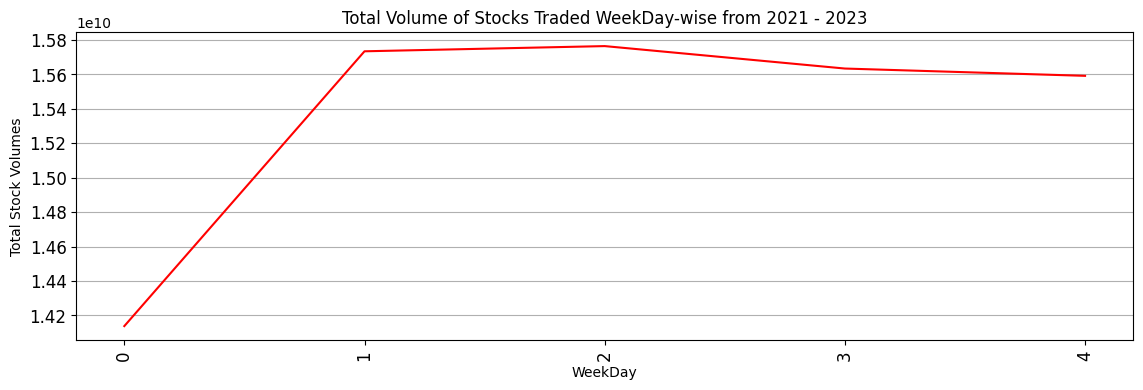

In [20]:
df4 = stock_data_tsla.reset_index(inplace=True)
df4 = stock_data_tsla.rename(columns = {'index':'Date'})

df4['Year'] = df4['Date'].dt.year
df4['Month'] = df4['Date'].dt.month
df4['WeekDay'] = df4['Date'].dt.weekday


df4['Year'] = df4['Year'].astype(int)

# Group by 'Year' and sum 'Volume'
check = df4.groupby('Year')['Volume'].sum()

# Create the plot
plt.figure(figsize=(30, 4))
ax1 = plt.subplot(121)

# Plot the data
check.plot(legend=False, fontsize=12, title="Total Volume of Stocks Traded Year-wise from 2021 - 2023", rot=90, color="green", ax=ax1)

# Format the x-axis to display whole numbers (years) and set appropriate tick labels
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensures that only integers (whole years) are used as x-ticks

# Set y-axis label and enable grid lines for y-axis
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)


check = df4.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise from 2021 - 2023", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

df4['WeekDay'] = df4['WeekDay'].astype(int)

# Group by 'WeekDay' and sum 'Volume'
check = df4.groupby('WeekDay')['Volume'].sum()

# Create the plot
plt.figure(figsize=(30, 4))
ax1 = plt.subplot(121)

# Plot the data
check.plot(legend=False, fontsize=12, title="Total Volume of Stocks Traded WeekDay-wise from 2021 - 2023", rot=90, color="red", ax=ax1)

# Format the x-axis to display whole numbers (weekdays)
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensures that only integers are used as x-ticks

# Set y-axis label and enable grid lines for y-axis
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)


## Kernel Density Estimation

[*********************100%%**********************]  1 of 1 completed


Mean of Adjusted Close: 246.9119654398357
Variance of Adjusted Close: 3089.7499377286126
Skewness of Adjusted Close: 0.32448190440475155
Kurtosis of Adjusted Close: 0.19546977087700057


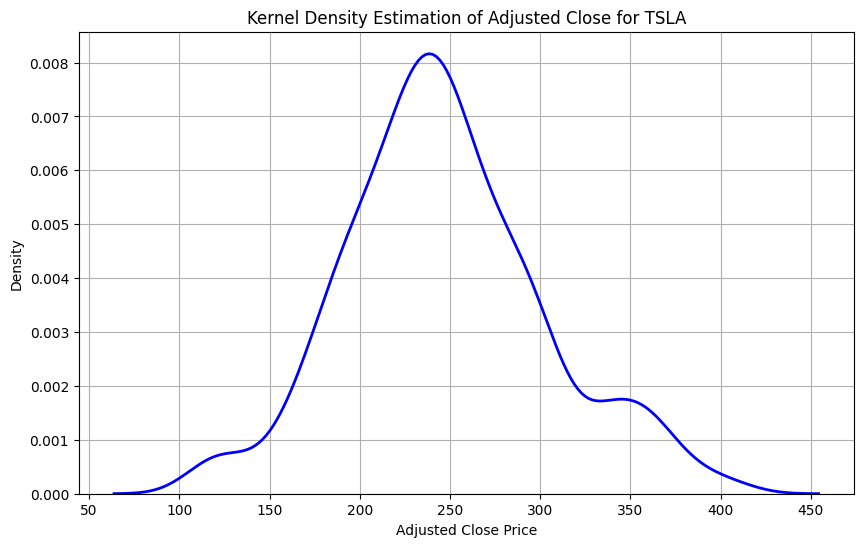

In [141]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Define the stock symbol and time range
stock_symbol = "TSLA"
start_date = "2021-01-01"
end_date = "2023-12-31"

# Fetch the stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate mean, variance, skewness, and kurtosis of Adjusted Close
adj_close = stock_data['Adj Close']
mean_adj_close = adj_close.mean()
variance_adj_close = adj_close.var()
skewness_adj_close = skew(adj_close)
kurtosis_adj_close = kurtosis(adj_close)

# Print the statistics
print("Mean of Adjusted Close:", mean_adj_close)
print("Variance of Adjusted Close:", variance_adj_close)
print("Skewness of Adjusted Close:", skewness_adj_close)
print("Kurtosis of Adjusted Close:", kurtosis_adj_close)

# Plot the nonparametric kernel density of Adjusted Close
plt.figure(figsize=(10, 6))
sns.kdeplot(adj_close, color='blue', linewidth=2)
plt.title('Kernel Density Estimation of Adjusted Close for TSLA')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [142]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols
tickers = ['TSLA', 'NIO', 'GM','F']

# Download historical stock price data
stock_data_all = yf.download(tickers, start='2021-01-01', end='2023-12-31', progress=False)['Adj Close']

# Fill NA values with the previous day's data
stock_data_all = stock_data_all.fillna(method='ffill')

daily_returns_all = stock_data_all.pct_change()

# The index represents each day, accurately reflecting the period for the daily returns
daily_returns_all.index.name = 'Date'
stock_data_all

Ticker,F,GM,NIO,TSLA
Date,,,,
2021-01-04,7.234353,39.782612,53.490002,243.256668
2021-01-05,7.344736,40.911964,53.200001,245.036667
2021-01-06,7.506066,42.208260,50.500000,251.993332
2021-01-07,7.692869,42.542160,54.279999,272.013336
2021-01-08,7.641923,42.286827,58.919998,293.339996
...,...,...,...,...
2023-12-22,12.025517,35.913616,8.420000,252.539993
2023-12-26,12.122890,36.023293,9.330000,256.609985
2023-12-27,12.064466,35.973442,9.100000,261.440002


## Kernel Density Estimation of Daily Returns

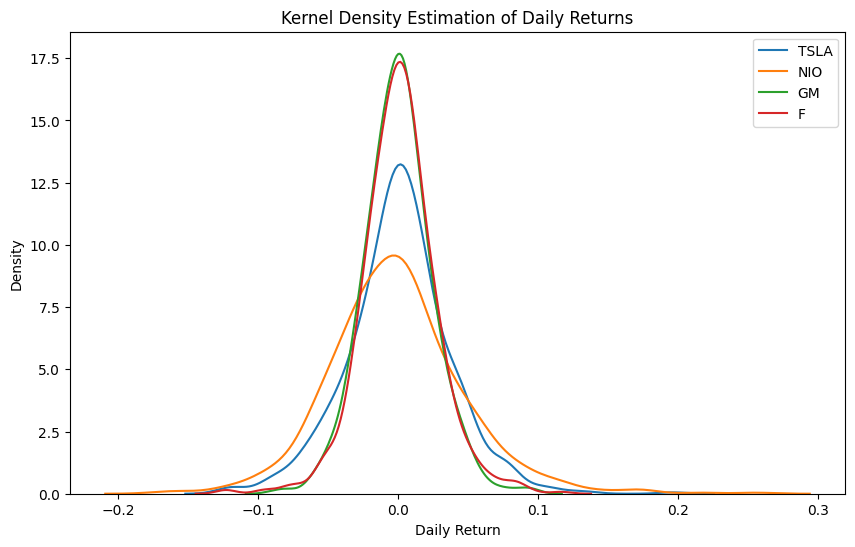

Ticker,F,GM,NIO,TSLA
count,752.000000,752.000000,752.000000,752.000000
mean,0.001017,0.000163,-0.001206,0.000715
std,0.026781,0.024652,0.048305,0.037099
min,-0.123242,-0.089150,-0.170708,-0.122422
25%,-0.014581,-0.014996,-0.029979,-0.020077
50%,0.000745,0.000092,-0.003603,0.001535
75%,0.015347,0.014663,0.023278,0.020416
max,0.116674,0.097458,0.255861,0.196412


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate summary statistics
summary_statistics = daily_returns_all.describe()

# Plotting the kernel density estimation (KDE)
plt.figure(figsize=(10, 6))
for ticker in tickers:
    sns.kdeplot(daily_returns_all[ticker], label=ticker)

plt.title('Kernel Density Estimation of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()

plt.show()

summary_statistics

# **Fetching Daily data from Fama French,ADS and Fred Website and Combining their Data**

## Fetching Tesla Daily Stock Price

In [144]:
import pandas as pd
import yfinance as yf

# Set the date range
start_date = '2021-01-01'
end_date = '2023-12-31'

# Fetch Tesla stock data
tesla_data = yf.download('TSLA', start=start_date, end=end_date)

# Calculate daily returns
tesla_data['TSLA'] = tesla_data['Adj Close'].pct_change()

# Prepare the DataFrame to only include returns
df_tesla = tesla_data[['TSLA']]


[*********************100%%**********************]  1 of 1 completed


In [145]:
df_tesla.head()

,TSLA
Date,
2021-01-04,NaN
2021-01-05,0.007317
2021-01-06,0.028390
2021-01-07,0.079447
2021-01-08,0.078403


## Fama - French

In [146]:
# Load and prepare Fama-French data
data_ff5 = pd.read_csv('/content/Modified_F-F_Research_Data_5_Factors_2x3_daily.csv')
data_ff5['date'] = pd.to_datetime(data_ff5['date'])
df_ffs = data_ff5.set_index('date')

# Define the full date range from 2018-01-01 to 2023-12-31
full_date_range = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')

# Reindex the dataframe to include all days in the range, forward filling missing data
df_ffs = df_ffs.reindex(full_date_range).ffill().dropna()

# Your dataframe df_ffs now includes all days between 2018-01-01 and 2023-12-31, with missing data filled
print(df_ffs.head(10))

            Mkt-RF   SMB   HML   RMW   CMA   RF
2021-01-04   -1.41  0.16  0.58 -0.64  0.10  0.0
2021-01-05    0.86  1.32  0.49  0.36  0.55  0.0
2021-01-06    0.79  3.15  3.94  0.06  0.53  0.0
2021-01-07    1.76  0.02 -0.83 -1.50 -0.20  0.0
2021-01-08    0.51 -1.01 -1.37 -0.43 -0.37  0.0
2021-01-09    0.51 -1.01 -1.37 -0.43 -0.37  0.0
2021-01-10    0.51 -1.01 -1.37 -0.43 -0.37  0.0
2021-01-11   -0.51  0.54  1.26 -0.17  0.45  0.0
2021-01-12    0.38  1.48  1.21 -0.45  0.42  0.0
2021-01-13    0.07 -1.03 -0.46 -0.21 -0.05  0.0


## ADS

In [147]:
data_ads = pd.read_excel('/content/Modified_ADS_Index_Most_Current_Vintage.xlsx')
data_ads['date'] = pd.to_datetime(data_ads['date'])
df_ads = data_ads.set_index('date')

# Define the full date range from 2018-01-01 to 2023-12-31
full_date_range = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')

# Reindex the dataframe to include all days in the range, forward filling missing data
df_ads = df_ads.reindex(full_date_range).ffill()
df_ads.head(10)

,ADS_Index
2021-01-01,0.632863
2021-01-02,0.651154
2021-01-03,0.665838
2021-01-04,0.679514
2021-01-05,0.692189
2021-01-06,0.703867
2021-01-07,0.714553
2021-01-08,0.724251
2021-01-09,0.732964
2021-01-10,0.740696


## Fred

In [148]:
from fredapi import Fred
fred = Fred(api_key='4d7c6d941e4808c7f185ce5b9a4a4fc5')
varList = ['SP500', 'T10Y3M', 'DEXUSEU', 'DEXJPUS', 'DEXUSUK',
                 'DCOILBRENTEU', 'VIXCLS', 'CBBTCUSD', 'CBETHUSD', 'T10YIE']

df_fred = pd.DataFrame(index=pd.date_range(start='2021-01-01', end='2023-12-31'))

# Fetch and merge FRED data
for var in varList:
    try:
        data = fred.get_series(var, observation_start='2021-01-01', observation_end='2023-12-31')
        data.name = var
        df_fred = df_fred.join(data).ffill().interpolate().dropna()  # Forward fill to handle missing days
    except Exception as e:
        print(f"Error fetching {var}: {e}")
df_fred.head(10)


,SP500,T10Y3M,DEXUSEU,DEXJPUS,DEXUSUK,DCOILBRENTEU,VIXCLS,CBBTCUSD,CBETHUSD,T10YIE
2021-01-04,3700.65,0.84,1.2254,103.19,1.3551,50.37,26.97,32127.31,1050.00,2.01
2021-01-05,3726.86,0.87,1.2295,102.70,1.3620,53.16,25.34,34131.23,1111.00,2.03
2021-01-06,3748.14,0.95,1.2290,103.25,1.3593,53.80,25.07,36979.81,1219.00,2.06
2021-01-07,3803.79,0.99,1.2265,103.84,1.3551,53.70,22.37,39573.39,1231.40,2.09
2021-01-08,3824.68,1.05,1.2252,103.89,1.3583,55.51,21.56,40666.72,1223.44,2.06
2021-01-09,3824.68,1.05,1.2252,103.89,1.3583,55.51,21.56,40346.30,1287.91,2.06
2021-01-10,3824.68,1.05,1.2252,103.89,1.3583,55.51,21.56,38242.02,1258.38,2.06
2021-01-11,3799.61,1.07,1.2169,104.16,1.3522,54.84,24.08,35474.31,1089.91,2.06
2021-01-12,3801.19,1.06,1.2168,104.09,1.3637,55.98,23.33,33968.43,1045.38,2.08
2021-01-13,3809.84,1.01,1.2159,103.91,1.3631,55.52,22.21,37520.66,1134.36,2.06


## Combining Data

In [149]:
combined_df = pd.concat([df_ffs, df_ads, df_fred,df_tesla], axis=1)


combined_df.ffill(inplace=True)
combined_df.dropna(inplace=True)
# Save to CSV
combined_df.to_csv('combined_data.csv', index=True)

In [150]:
combined_df.head(10)

,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,SP500,T10Y3M,DEXUSEU,DEXJPUS,DEXUSUK,DCOILBRENTEU,VIXCLS,CBBTCUSD,CBETHUSD,T10YIE,TSLA
2021-01-05,0.86,1.32,0.49,0.36,0.55,0.0,0.692189,3726.86,0.87,1.2295,102.70,1.3620,53.16,25.34,34131.23,1111.00,2.03,0.007317
2021-01-06,0.79,3.15,3.94,0.06,0.53,0.0,0.703867,3748.14,0.95,1.2290,103.25,1.3593,53.80,25.07,36979.81,1219.00,2.06,0.028390
2021-01-07,1.76,0.02,-0.83,-1.50,-0.20,0.0,0.714553,3803.79,0.99,1.2265,103.84,1.3551,53.70,22.37,39573.39,1231.40,2.09,0.079447
2021-01-08,0.51,-1.01,-1.37,-0.43,-0.37,0.0,0.724251,3824.68,1.05,1.2252,103.89,1.3583,55.51,21.56,40666.72,1223.44,2.06,0.078403
2021-01-09,0.51,-1.01,-1.37,-0.43,-0.37,0.0,0.732964,3824.68,1.05,1.2252,103.89,1.3583,55.51,21.56,40346.30,1287.91,2.06,0.078403
2021-01-10,0.51,-1.01,-1.37,-0.43,-0.37,0.0,0.740696,3824.68,1.05,1.2252,103.89,1.3583,55.51,21.56,38242.02,1258.38,2.06,0.078403
2021-01-11,-0.51,0.54,1.26,-0.17,0.45,0.0,0.741606,3799.61,1.07,1.2169,104.16,1.3522,54.84,24.08,35474.31,1089.91,2.06,-0.078214
2021-01-12,0.38,1.48,1.21,-0.45,0.42,0.0,0.735695,3801.19,1.06,1.2168,104.09,1.3637,55.98,23.33,33968.43,1045.38,2.08,0.047153
2021-01-13,0.07,-1.03,-0.46,-0.21,-0.05,0.0,0.722960,3809.84,1.01,1.2159,103.91,1.3631,55.52,22.21,37520.66,1134.36,2.06,0.005851
2021-01-14,-0.11,2.37,1.12,-1.01,0.43,0.0,0.703397,3795.54,1.06,1.2156,103.66,1.3690,55.76,23.25,39171.12,1235.68,2.09,-0.011014


In [151]:
data_path = '/content/combined_data.csv'
sample_data = pd.read_csv(data_path)
sample_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
sample_data['Date'] = pd.to_datetime(sample_data['Date'])

# Set 'Date' as the index of the DataFrame
sample_data.set_index('Date', inplace=True)

# **Perform regression and feature selection**

In [152]:
import numpy as np
import scipy.stats as ss
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Define X and y from the dataset
X = sample_data.drop(columns=['TSLA'])  # Independent variables
y = sample_data['TSLA'].values  # Dependent variable 'TSLA'

# Add a constant to X for OLS regression
X = sm.add_constant(X)

# Define the function to perform feature selection and regression for given methods
def perform_regression(X, y):
    results = {}

    # Least Angle Regression (LARS)
    model_lars = linear_model.Lars().fit(X, y)
    select_lars = X.columns[model_lars.coef_ != 0]
    x_lars = X[select_lars]
    lars_reg = sm.OLS(y, x_lars).fit()
    y_pred_lars = lars_reg.predict(x_lars)
    rmse_lars = np.sqrt(mean_squared_error(y, y_pred_lars))
    rmse_lars = rmse_lars
    results['LARS'] = {
        'Regression': lars_reg,
        'Selected Features': select_lars,
        'Correlation': ss.pearsonr(y_pred_lars, y)[0],
        'RMSE': rmse_lars
    }

    # Ridge Regression
    alpha_ridge = 0.5
    model_ridge = linear_model.Ridge(alpha=alpha_ridge, fit_intercept=False).fit(X, y)
    select_ridge = X.columns[np.abs(model_ridge.coef_) > 0.001]
    x_ridge = X[select_ridge]
    ridge_reg = sm.OLS(y, x_ridge).fit()
    y_pred_ridge = ridge_reg.predict(x_ridge)
    rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))
    results['Ridge'] = {
        'Regression': ridge_reg,
        'Selected Features': select_ridge,
        'Correlation': ss.pearsonr(y_pred_ridge, y)[0],
        'RMSE': rmse_ridge
    }

    # LASSO
    alpha_lasso = 0.5
    model_lasso = linear_model.Lasso(alpha=alpha_lasso, fit_intercept=False).fit(X, y)
    select_lasso = X.columns[model_lasso.coef_ != 0]
    x_lasso = X[select_lasso]
    lasso_reg = sm.OLS(y, x_lasso).fit()
    y_pred_lasso = lasso_reg.predict(x_lasso)
    rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))
    results['LASSO'] = {
        'Regression': lasso_reg,
        'Selected Features': select_lasso,
        'Correlation': ss.pearsonr(y_pred_lasso, y)[0],
        'RMSE': rmse_lasso
    }

    # Elastic Net
    alpha_elastic = 0.5
    model_elastic = linear_model.ElasticNet(alpha=alpha_elastic, fit_intercept=False).fit(X, y)
    select_elastic = X.columns[model_elastic.coef_ != 0]
    x_elastic = X[select_elastic]
    elastic_reg = sm.OLS(y, x_elastic).fit()
    y_pred_elastic = elastic_reg.predict(x_elastic)
    rmse_elastic = np.sqrt(mean_squared_error(y, y_pred_elastic))
    results['Elastic Net'] = {
        'Regression': elastic_reg,
        'Selected Features': select_elastic,
        'Correlation': ss.pearsonr(y_pred_elastic, y)[0],
        'RMSE': rmse_elastic
    }

    return results

# Perform regression and feature selection
regression_results = perform_regression(X, y)

# Output summaries for each regression model
for method, result in regression_results.items():
    print(f"Results for {method}:")
    print(result['Regression'].summary())
    print(f"Correlation (Y, Y_pred): {result['Correlation']}")
    print(f"Selected Features: {result['Selected Features'].values}")
    print(f"RMSE: {result['RMSE']}\n")



Results for LARS:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.441
Method:                 Least Squares   F-statistic:                              51.53
Date:                Thu, 18 Apr 2024   Prob (F-statistic):                   4.53e-126
Time:                        02:02:28   Log-Likelihood:                          2417.7
No. Observations:                1091   AIC:                                     -4801.
Df Residuals:                    1074   BIC:                                     -4717.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Extract correlations from the regression results

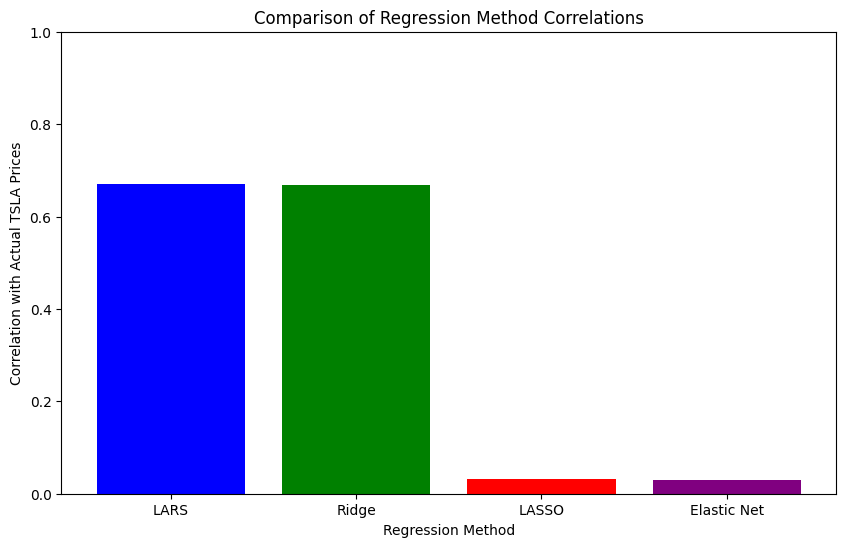

In [153]:
import matplotlib.pyplot as plt

# Extract correlations from the regression results
correlations = {
    'LARS': regression_results['LARS']['Correlation'],
    'Ridge': regression_results['Ridge']['Correlation'],
    'LASSO': regression_results['LASSO']['Correlation'],
    'Elastic Net': regression_results['Elastic Net']['Correlation']
}

# Names and values for the plot
methods = list(correlations.keys())
correlation_values = list(correlations.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, correlation_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Regression Method')
plt.ylabel('Correlation with Actual TSLA Prices')
plt.title('Comparison of Regression Method Correlations')
plt.ylim(0, 1)  # Set the limit for y-axis to normalize correlation range
plt.show()


## RMSE Values for each Model

In [154]:
rmse_values = {
    'LARS': regression_results['LARS']['RMSE'],
    'Ridge': regression_results['Ridge']['RMSE'],
    'LASSO': regression_results['LASSO']['RMSE'],
    'Elastic Net': regression_results['Elastic Net']['RMSE']
}

rmse_values

{'LARS': 0.026383852852908184,
 'Ridge': 0.026467537176740313,
 'LASSO': 0.03553189392189609,
 'Elastic Net': 0.03552584258060254}

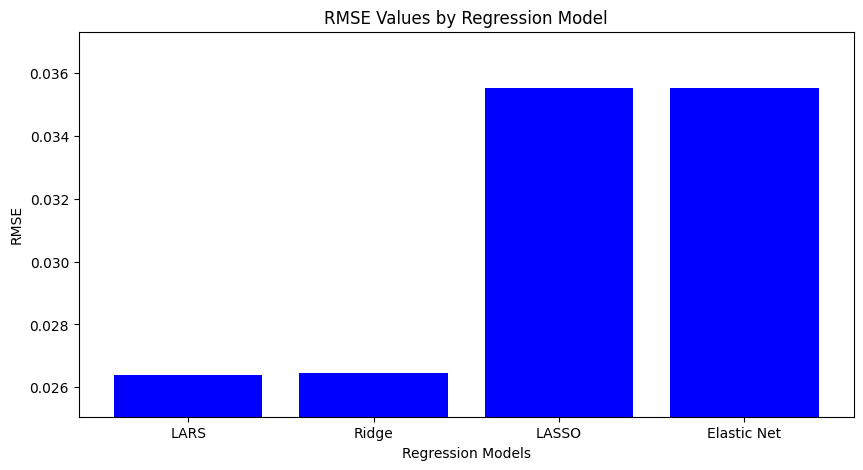

In [155]:
import matplotlib.pyplot as plt


# Extracting RMSE values into a dictionary
rmse_values = {
    'LARS': regression_results['LARS']['RMSE'],
    'Ridge': regression_results['Ridge']['RMSE'],
    'LASSO': regression_results['LASSO']['RMSE'],
    'Elastic Net': regression_results['Elastic Net']['RMSE']
}

# Names of the models
models = list(rmse_values.keys())

# Corresponding RMSE values
errors = list(rmse_values.values())

# Creating the bar graph
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(models, errors, color='blue')  # Create a bar graph
plt.xlabel('Regression Models')  # Label on X axis
plt.ylabel('RMSE')  # Label on Y axis
plt.title('RMSE Values by Regression Model')  # Title of the graph
plt.ylim(min(errors) * 0.95, max(errors) * 1.05)  # Set the limits for Y axis for better visualization
plt.show()

## Random Forest and XGBoost

In [156]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as ss

# Assuming X and y are already defined
# Removing the constant added for OLS models
X_rf_xgb = X.drop(columns='const')

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees
rf_model.fit(X_rf_xgb, y)
y_pred_rf = rf_model.predict(X_rf_xgb)
corr_rf = ss.pearsonr(y_pred_rf, y)[0]
r2_rf = r2_score(y, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))  # Calculate RMSE for Random Forest

# XGBoost Regression
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_rf_xgb, y)
y_pred_xgb = xgb_model.predict(X_rf_xgb)
corr_xgb = ss.pearsonr(y_pred_xgb, y)[0]
r2_xgb = r2_score(y, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y, y_pred_xgb))  # Calculate RMSE for XGBoost

# Print results
print("Random Forest Correlation Coefficient:", corr_rf)
print("XGBoost Correlation Coefficient:", corr_xgb)
print("----------------------------------------------------------------")
print("Random Forest R^2 Scores:", r2_rf)
print("XGBoost R^2 Scores:", r2_xgb)
print("----------------------------------------------------------------")
print("Random Forest RMSE:", rmse_rf)
print("XGBoost RMSE:", rmse_xgb)


Random Forest Correlation Coefficient: 0.979726418294684
XGBoost Correlation Coefficient: 0.8679407838530838
----------------------------------------------------------------
Random Forest R^2 Scores: 0.949717607109958
XGBoost R^2 Scores: 0.7361143222025939
----------------------------------------------------------------
Random Forest RMSE: 0.007969709178972925
XGBoost RMSE: 0.0182575464941825


## Data Visualization

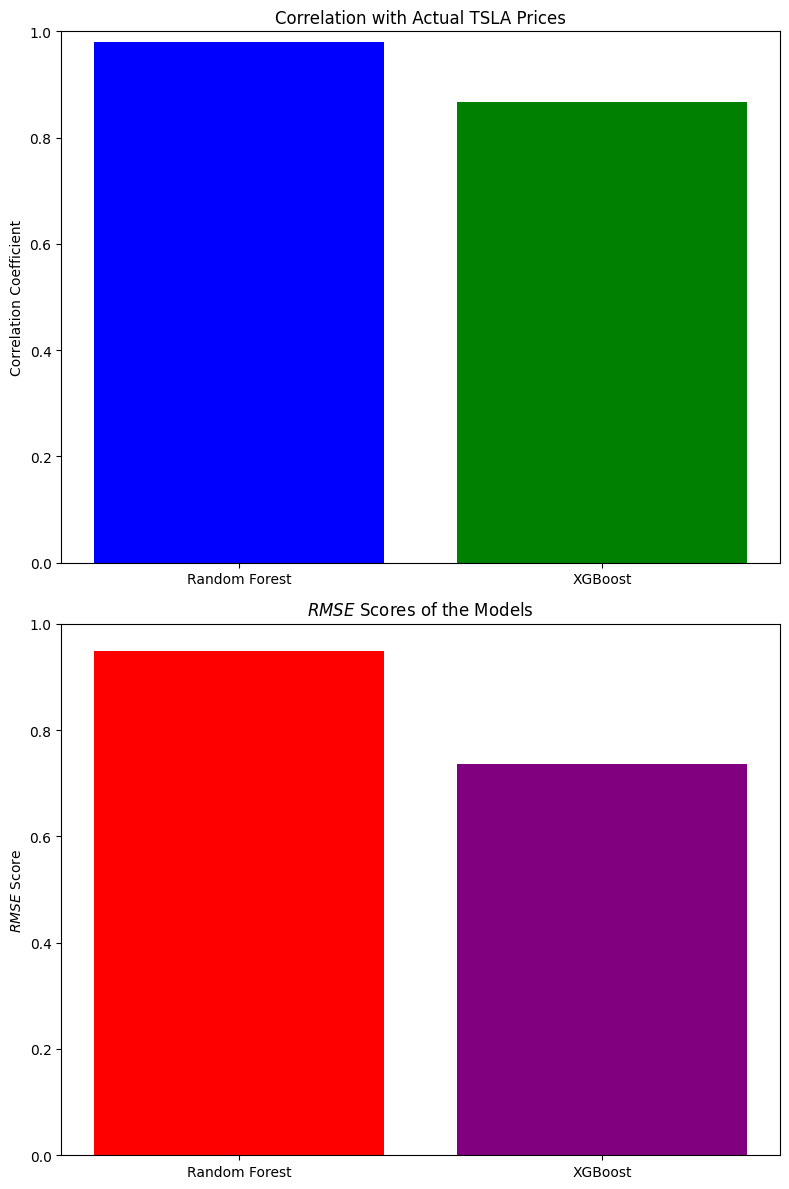

In [157]:
# Data for visualization
models = ['Random Forest', 'XGBoost']
correlations = [corr_rf, corr_xgb]
r2_scores = [r2_rf, r2_xgb]
rmse_score = [rmse_rf,rmse_xgb]

# Creating the bar chart
fig, ax = plt.subplots(2, 1, figsize=(8, 12))

# Correlation plot
ax[0].bar(models, correlations, color=['blue', 'green'])
ax[0].set_title('Correlation with Actual TSLA Prices')
ax[0].set_ylabel('Correlation Coefficient')
ax[0].set_ylim(0, 1)  # Normalize the range to 0-1 for correlation

# R^2 score plot
ax[1].bar(models, r2_scores, color=['red', 'purple'])
ax[1].set_title('$R^2$ Scores of the Models')
ax[1].set_ylabel('$R^2$ Score')
ax[1].set_ylim(0, 1)  # Normalize the range to 0-1 for R^2 score

# RMSE score plot
ax[1].bar(models, rmse_score, color=['red', 'purple'])
ax[1].set_title('$RMSE$ Scores of the Models')
ax[1].set_ylabel('$RMSE$ Score')
ax[1].set_ylim(0, 1)  # Normalize the range to 0-1 for R^2 score

plt.tight_layout()
plt.show()


## Tesla's stock prices! Random Forest was more accurate and consistent in its guesses compared to XGBoost.

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf_xgb, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42),
    "SVR": SVR()
}

# Train the models and calculate RMSE
print("RMSE Scores of Each Model: ")
rmse_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse

rmse_scores


RMSE Scores of Each Model: 


{'Linear Regression': 0.029993940084968248,
 'Ridge Regression': 0.02993736815941913,
 'Decision Tree Regressor': 0.03384958203362986,
 'Random Forest Regressor': 0.0249931606565804,
 'XGBoost Regressor': 0.02913402738780779,
 'SVR': 0.039422025363077845}

## RMSE Model Performance:

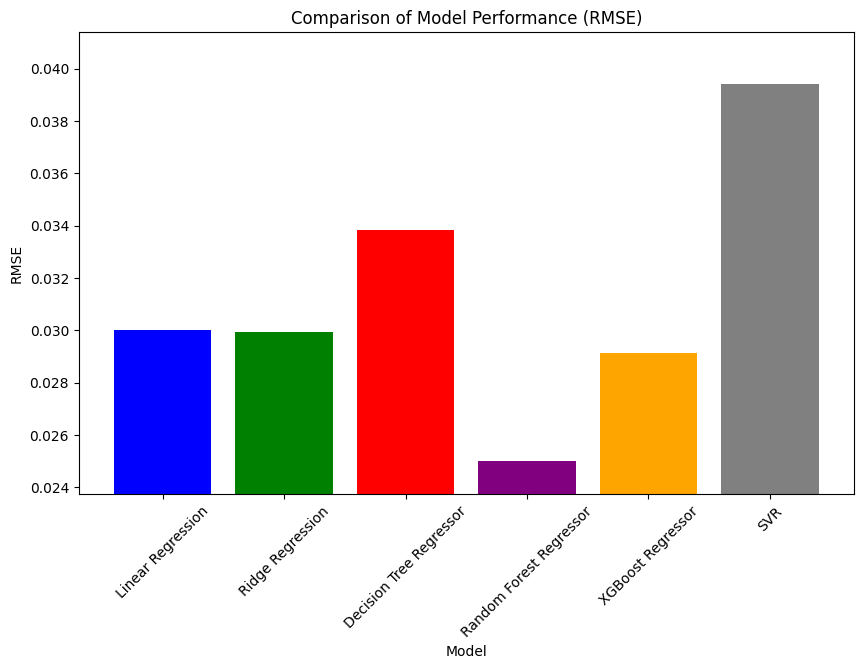

In [159]:

# Names and values for the plot
models = list(rmse_scores.keys())
rmse_values = list(rmse_scores.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange', 'gray'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Model Performance (RMSE)')
plt.xticks(rotation=45)
plt.ylim(min(rmse_values) * 0.95, max(rmse_values) * 1.05)  # Adjust y-axis limits for better visualization
plt.show()


* Random Forest Regressor has the lowest RMSE, indicating it performed the best among the models tested.
* Ridge Regression also shows strong performance with a slightly higher RMSE than Random Forest.
* XGBoost Regressor performed well, better than Linear Regression and SVR, showing its capability in handling complex patterns.
* SVR and Decision Tree Regressor have the highest RMSE, suggesting they were less accurate in their predictions compared to the others.




In [160]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the stock symbol and the time period
stock_symbol = "TSLA"
end_date = datetime.today()
start_date = end_date - timedelta(days=2*365)  # Two years from today

# Fetch the historical stock data from Yahoo Finance
tesla_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the data to ensure it's loaded correctly
tesla_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-19,335.019989,344.980011,331.776672,342.716675,342.716675,49847700
2022-04-20,343.333344,344.666656,325.083344,325.733337,325.733337,70711200
2022-04-21,358.243347,364.073334,332.140015,336.260010,336.260010,105416400
2022-04-22,338.303345,344.950012,331.333344,335.016663,335.016663,69696600
2022-04-25,326.323334,336.206665,325.100006,332.673340,332.673340,68341200


##R^2 Values

In [161]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume tesla_data is your DataFrame containing the features and target variable
# Preparing data
X = tesla_data.drop('Close', axis=1)  # Features (e.g., Open, High, Low, Volume)
y = tesla_data['Close']               # Target (next day's Close price)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Save models (optional)
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')

# Evaluate models
print("Random Forest R^2 Score:", rf_r2)
print("XGBoost R^2 Score:", xgb_r2)


Random Forest R^2 Score: 0.999013328182444
XGBoost R^2 Score: 0.9986207648489198


## GARCH

[*********************100%%**********************]  1 of 1 completed


         Current function value: -3352.663246
         Iterations: 0
         Function evaluations: 546
         Gradient evaluations: 108
RMSE value is:  0.05564384321531324


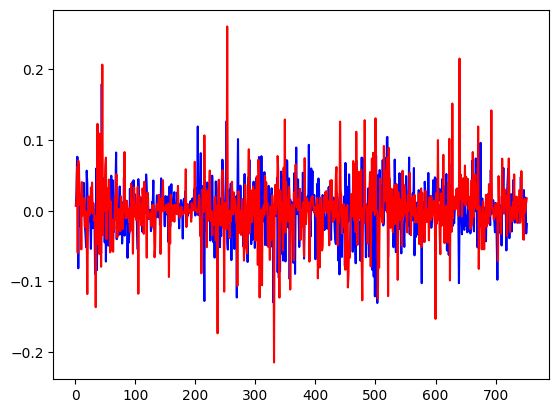

In [162]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

def garch(param, *args):
    # Initialize Params
    mu = param[0]
    omega = param[1]
    alpha = param[2]
    beta = param[3]
    GARCH_Dens, sigma2, F, v = {}, {}, {}, {}
    # intialize values
    sigma2[0] = np.var(Y)
    Likelihood = 0
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((Y[t-1] - mu)**2) + beta * (sigma2[t-1])
        F[t] = Y[t] - mu - np.sqrt(sigma2[t]) * np.random.normal(0, 1, 1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2) * np.log(2 * np.pi) + (1/2) * np.log(v[t]) + \
                        (1/2) * (F[t] / v[t])
        Likelihood += GARCH_Dens[t]
    return Likelihood

def garch_path(params, *args):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    sigma2, path = {}, {}
    # initialize volatility and path
    sigma2[0] = np.var(Y)
    path[0] = np.array([Y[0]])
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((Y[t-1] - mu)**2) + beta * (sigma2[t-1])
        path[t] = mu + np.sqrt(sigma2[t]) * np.random.normal(0, 1, 1)
    return path, sigma2

start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 12, 31)
stock_symbol = 'TSLA'
stock = yf.download(stock_symbol, start_date, end_date)
Y = np.diff(np.log(stock['Adj Close'].values))
T = Y.shape[0]
#param0 = np.array([np.mean(Y), np.var(Y) / 900, 1.2, 0.25])
param0 = np.array([np.mean(Y), np.var(Y) / 900, 1.2, 0.1])
results = minimize(garch, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
param_star = results.x
path, vol = garch_path(param_star, Y, T)
Y_GARCH = np.hstack([path[t] for t in path])
timevec = np.linspace(1, T, T)
plt.plot(timevec, Y, 'b', timevec, Y_GARCH, 'r')
RMSE = np.sqrt(np.mean((Y_GARCH - Y)**2))
print('RMSE value is: ', RMSE)


## Kalman Filter

[*********************100%%**********************]  1 of 1 completed


         Current function value: 2750.685779
         Iterations: 40
         Function evaluations: 595
         Gradient evaluations: 119
RMSE value is: $ 3.3051996282281015


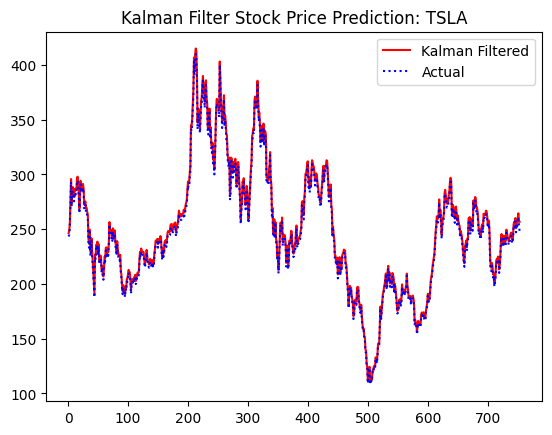

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
from datetime import datetime

def kalman_filter(param, *args):
    Z = param[0]
    T = param[1]
    H = param[2]
    Q = param[3]
    Y = args[0]
    S = len(Y)
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * T + Q
    Likelihood = 0
    for s in range(1, S):
        F[s] = Z * P_predict[s-1] * Z + H
        v[s] = Y[s-1] - Z * u_predict[s-1]
        u_update[s] = u_predict[s-1] + P_predict[s-1] * Z * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s-1] - P_predict[s-1] * Z * (1 / F[s]) * Z * P_predict[s-1]
        P_predict[s] = T * P_update[s] * T + Q
        Likelihood += (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(abs(F[s])) + (1 / 2) * v[s]**2 / F[s]
    return Likelihood

def kalman_smoother(params, *args):
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    Y = args[0]
    S = len(Y)
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * T + Q
    for s in range(1, S):
        F[s] = Z * P_predict[s-1] * Z + H
        v[s] = Y[s-1] - Z * u_predict[s-1]
        u_update[s] = u_predict[s-1] + P_predict[s-1] * Z * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s-1] - P_predict[s-1] * Z * (1 / F[s]) * Z * P_predict[s-1]
        P_predict[s] = T * P_update[s] * T + Q

    u_smooth = {S-1: u_update[S-1]}
    for t in range(S-1, 0, -1):
        u_smooth[t-1] = u_update[t] + P_update[t] * T / P_predict[t] * (u_smooth[t] - T * u_update[t])

    smooth_path = [u_smooth[t] for t in sorted(u_smooth)]
    return smooth_path

start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 12, 31)
stock_symbol = 'TSLA'
stock = yf.download(stock_symbol, start=start_date, end=end_date)
Y = stock['Adj Close'].values
param0 = np.array([1.2, 0.7, np.var(Y)/50, np.var(Y)/50])
results = minimize(kalman_filter, param0, args=(Y,), method='BFGS', options={'xtol': 1e-8, 'disp': True})

# smooth and visualize the estimated path
param_star = results.x
smoothed_path = kalman_smoother(param_star, Y)
Y_kalmanFilter = np.array(smoothed_path)

timevec = np.linspace(1, len(Y), len(Y))
plt.title('Kalman Filter Stock Price Prediction: ' + stock_symbol)
plt.plot(timevec, Y_kalmanFilter, 'r', label='Kalman Filtered')
plt.plot(timevec, Y, 'b:', label='Actual')
plt.legend()

RMSE = np.sqrt(np.mean((Y_kalmanFilter - Y)**2))
print('RMSE value is: $', RMSE)


## Extra Credits for Long_Short and Buy and Hold Strategy

In [164]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your test features and 'y' is your actual outcomes for the test set
# You should replace this part with loading your actual test dataset
X = sample_data.drop(columns=['TSLA'])  # Your test features
y = sample_data['TSLA'].values  # Your actual outcomes

# Prepare a DataFrame to store predictions
predictions = pd.DataFrame(index=sample_data.index)

# Standardize features for models that benefit from it
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Initialize and train models (replace with your trained models)
models = {
    'LARS': linear_model.Lars().fit(X_standardized, y),
    'Ridge': linear_model.Ridge(alpha=0.5).fit(X_standardized, y),
    'LASSO': linear_model.Lasso(alpha=0.5).fit(X_standardized, y),
    'ElasticNet': linear_model.ElasticNet(alpha=0.5).fit(X_standardized, y),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42).fit(X, y),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(X, y)
}

# Generate predictions for each model
for name, model in models.items():
    if name in ['LARS', 'Ridge', 'LASSO', 'ElasticNet']:
        predictions[name] = model.predict(X_standardized)
    else:
        predictions[name] = model.predict(X)

# Save the predictions to a CSV file
predictions.to_csv('predictions.csv')

# Load the predictions CSV
predictions_df = pd.read_csv('predictions.csv')

# View the first few rows of the DataFrame
print(predictions_df.head())



         Date      LARS     Ridge     LASSO  ElasticNet  RandomForest  \
0  2021-01-05 -0.005133  0.000200  0.000829    0.000829      0.012989   
1  2021-01-06 -0.015467 -0.009251  0.000829    0.000829      0.025031   
2  2021-01-07  0.033596  0.039052  0.000829    0.000829      0.055514   
3  2021-01-08  0.012289  0.017251  0.000829    0.000829      0.077210   
4  2021-01-09  0.012661  0.017227  0.000829    0.000829      0.076451   

    XGBoost  
0  0.009311  
1  0.018742  
2  0.063581  
3  0.065422  
4  0.065422  


In [165]:
import yfinance as yf
import pandas as pd

# Define your stock and time period
stock_symbol = 'TSLA'
start_date = '2021-01-01'
end_date = '2023-12-31'

# Fetch the stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Returns'] = stock_data['Adj Close'].pct_change()

# Prepare DataFrame with just the date and daily returns
actual_returns = stock_data[['Daily_Returns']]

print(actual_returns.head())

# Save to CSV
actual_returns.to_csv('actual_returns.csv')


[*********************100%%**********************]  1 of 1 completed

            Daily_Returns
Date                     
2021-01-04            NaN
2021-01-05       0.007317
2021-01-06       0.028390
2021-01-07       0.079447
2021-01-08       0.078403


In [166]:
import pandas as pd
import numpy as np

# Load predictions and actual returns
predictions = pd.read_csv('predictions.csv', index_col='Date', parse_dates=True)
actual_returns = pd.read_csv('actual_returns.csv', index_col='Date', parse_dates=True)

# Print loaded DataFrames for verification
print("Loaded Predictions DataFrame:")
print(predictions.head())
print("\nLoaded Actual Returns DataFrame:")
print(actual_returns.head())

# Ensure column name for actual_returns matches expected name
actual_returns.columns = ['TSLA']

# Handle NaN values in actual_returns by forward filling then backward filling
actual_returns.fillna(method='ffill', inplace=True)
actual_returns.fillna(method='bfill', inplace=True)

# Print to verify NaN handling in actual_returns
print("\nActual Returns DataFrame after handling NaNs:")
print(actual_returns.head())

# Ensure all data in predictions is numeric and handle missing data
predictions = predictions.apply(pd.to_numeric, errors='coerce')
predictions.fillna(method='ffill', inplace=True)

# Print to verify predictions are all numeric and NaNs handled
print("\nPredictions DataFrame after ensuring numeric and handling NaNs:")
print(predictions.head())

# Generate trading signals using np.sign: positive predictions signal buying; negative predictions signal selling
signals = predictions.apply(np.sign).shift(1)  # Shift signals to act on the next day's returns
# signals = signals.reindex(actual_returns.index)

# Print the first few rows of signals for verification
print("\nSignals DataFrame (after shifting):")
print(signals.head())

# Correctly calculate daily PnL by multiplying signals by actual returns
daily_pnl = signals.multiply(actual_returns['TSLA'], axis='index')
# Option 1: Fill NaN values with 0 (no action)
daily_pnl.fillna(0, inplace=True)

# Option 2: Forward fill NaN values (hold previous position)
daily_pnl.fillna(method='ffill', inplace=True)


# Print the first few rows of daily PnL for verification
print("\nDaily PnL DataFrame:")
print(daily_pnl.head())

# Calculate the total PnL for the Long-Short strategy for each model
total_pnl_per_model = daily_pnl.sum()

# Print the total PnL for each model
print("\nTotal PnL from Long-Short Strategy for each model:")
print(total_pnl_per_model)

# # Calculate the total PnL for the Buy-and-Hold strategy
# buy_and_hold_pnl = actual_returns['TSLA'].iloc[-1] - actual_returns['TSLA'].iloc[0]

# # Print the total PnL for the Buy-and-Hold strategy
# print(f"\nTotal PnL from Buy-and-Hold Strategy: {buy_and_hold_pnl}")

initial_price = stock_data['Adj Close'].iloc[0]
final_price = stock_data['Adj Close'].iloc[-1]
buy_and_hold_pnl = ((final_price - initial_price) / initial_price ) * 100

print("Buy and Hold Overall Percentage:" ,buy_and_hold_pnl)


Loaded Predictions DataFrame:
                LARS     Ridge     LASSO  ElasticNet  RandomForest   XGBoost
Date                                                                        
2021-01-05 -0.005133  0.000200  0.000829    0.000829      0.012989  0.009311
2021-01-06 -0.015467 -0.009251  0.000829    0.000829      0.025031  0.018742
2021-01-07  0.033596  0.039052  0.000829    0.000829      0.055514  0.063581
2021-01-08  0.012289  0.017251  0.000829    0.000829      0.077210  0.065422
2021-01-09  0.012661  0.017227  0.000829    0.000829      0.076451  0.065422

Loaded Actual Returns DataFrame:
            Daily_Returns
Date                     
2021-01-04            NaN
2021-01-05       0.007317
2021-01-06       0.028390
2021-01-07       0.079447
2021-01-08       0.078403

Actual Returns DataFrame after handling NaNs:
                TSLA
Date                
2021-01-04  0.007317
2021-01-05  0.007317
2021-01-06  0.028390
2021-01-07  0.079447
2021-01-08  0.078403

Predictions DataFram